1. Importing Libraries

In [46]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. Load Data

In [47]:
fraud= pd.read_csv("Fraud.csv")

3. Understanding the Data

In [48]:
fraud.shape

(6362620, 11)

In [49]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [50]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [51]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


4. Data Visualization

In [52]:
fraud.isna().sum()                                    # We have no null value in the dataset 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [53]:
fraud.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [54]:
correlation = fraud.corr()
correlation['isFraud'].reset_index().sort_values('isFraud',ascending = False)

,index,isFraud
6,isFraud,1.000000
1,amount,0.076688
7,isFlaggedFraud,0.044109
0,step,0.031578
2,oldbalanceOrg,0.010154
5,newbalanceDest,0.000535
4,oldbalanceDest,-0.005885
3,newbalanceOrig,-0.008148


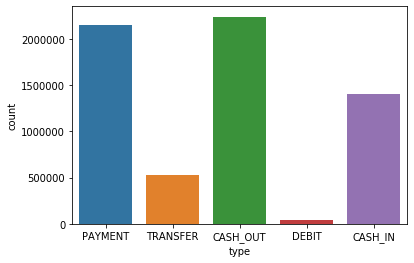

In [55]:
fraud.type.value_counts()
sns.countplot(x='type', data=fraud )
plt.show()

Mostly Payment Cash_out and Cash_in is used by users

In [56]:
fraud.isFraud.value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

Fraud has happened 8213 times 

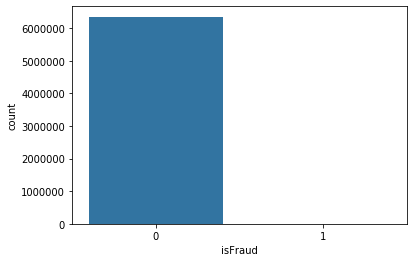

In [57]:
fraud.isFraud.value_counts()
sns.countplot(x='isFraud', data=fraud)
plt.show()

In [58]:
#One Hot Encoding

dummy_type=pd.get_dummies(fraud.type)
dummy_type

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
6362615,0,1,0,0,0
6362616,0,0,0,0,1
6362617,0,1,0,0,0
6362618,0,0,0,0,1


In [59]:
#Merging the dummy dataset and original dataset
fraud= pd.merge(
    left=fraud,
    right=dummy_type,
    left_index=True,
    right_index=True,
)
fraud.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [60]:
fraud.drop(columns="type")                                     # dropping the type column because we do not need it anymore.

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [61]:
fraud.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,0,0,0,0,1
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0,0,1,0,0,0


5. Data Preparation

In [62]:
#Split Dataset 
x = fraud[['CASH_IN','CASH_OUT','DEBIT',"PAYMENT",'TRANSFER','amount','oldbalanceOrg','newbalanceOrig']]
y = fraud[['isFraud']]

In [63]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4771965, 8), (1590655, 8), (4771965, 1), (1590655, 1))

The variables type, amount, oldbalanceorg, newbalanceorg are independent variables so they are used to train data
The variable isfraud is dependent variable so it is used to test data

6. Training the Algorithm

In [65]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
log = LogisticRegression()

# fit the model with data
log.fit(X_train, y_train)

C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nivedita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

I decided to use Logistic Regression for this problem. Logistic regression is used in discrete event data and classification problems. Logistic regression measures the relationship between dependent variable which is 'isFraud' column, and one or more independent variablIes such as our features 'amount', 'oldbalanceOrig' ect.

In [66]:
y_pred=log.predict(X_test)

6. Evaluating the Algorithm

In [67]:
# import the metrics class
from sklearn import metrics
cnf= metrics.confusion_matrix(y_test, y_pred)
cnf

array([[1587859,     769],
       [     62,    1965]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

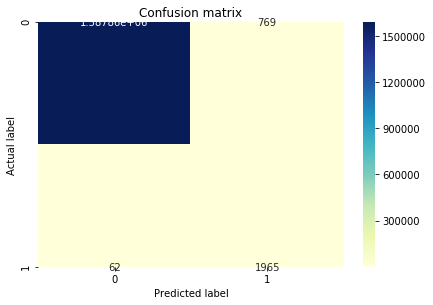

In [68]:
sns.heatmap((cnf), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9994775737039144


The accuracy of the model is 99.94% to detect the fraud

7. Making Predictions

In [70]:
y_predict=log.predict([[0,1,0,0,0,5000,5000,0]])
print(y_predict)

[1]


In [71]:
y_predict=log.predict([[1,0,0,0,0,1000,5000,4000]])
print(y_predict)

[0]


In [72]:
y_predict=log.predict([[1,0,0,0,0,5000,5000,0]])
print(y_predict)

[1]


Mostly fraud happens when there is CAsh_Out or Transfer as the balance becomes zero.
When the user uses Payment, Debit and Cash_in option the balance changes but it doesnot becomes zero so it aint a fraud


It is 100% red flag if the new balance suddenly becomes zero.
The Company should closely monitor Cash_out and Transfer done by user when the balance becomes zero because most of the fraud happen due to those types.
So when the new balance suddenly becomes zero the trasaction of the user should be stopped enquired and rechecked to avoid the fraud

If this actions are implemented it work almost all the time as the accuracy of our model is 99.94%